## GRIP - THE SPARK FOUNDATION
## DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP

# **TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

## By - Neha Nagpal


### In this regression task we will predict the percentage of marks that a student is expected to score based on the number of hours the studied. this is a simple linear regression task as it involves just two variables. 

## Import the required Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

## Reading The Data from data source

In [4]:
# Reading the Data 
student = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
student.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
student.shape

(25, 2)

In [8]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Check if there any null value in the Dataset

In [9]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

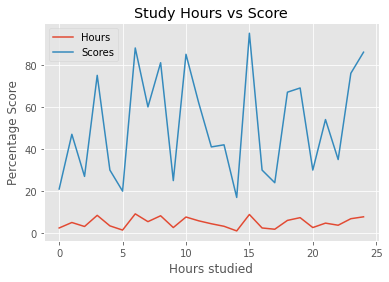

In [12]:
plt.style.use('ggplot')
student.plot(kind='line')
plt.title('Study Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

**Lets plot a regression line to see the correlation.**

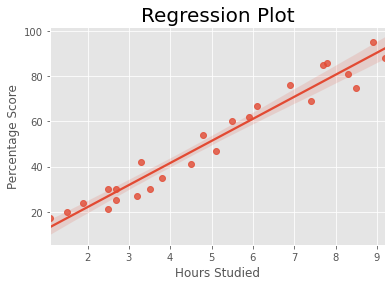

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [17]:
sns.regplot(x= student['Hours'], y= student['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage Score', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(student.corr())

**It is confirmed that the variables are positively correlated.**

## Data Visualisation with area plot

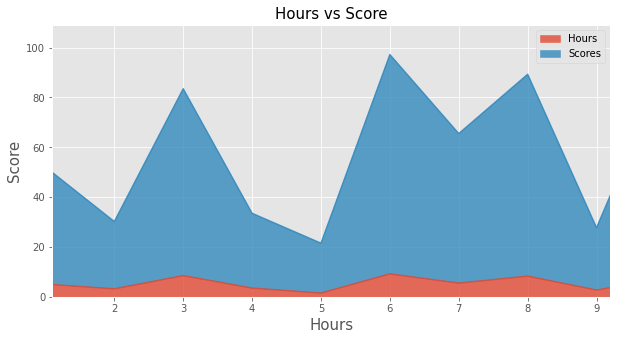

In [20]:
xmin = min(student.Hours)
xmax = max(student.Hours)
student.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title('Hours vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

 By Visualization we come to know that this problem can be easily solved by linear regression

## Modeling the data

## Training the Model
### 1) Splitting the Data

In [25]:
# Defining X and y from the Data
x = student.iloc[:, :-1].values  
y = student.iloc[:, 1].values

# Spliting the Data in two
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=2)

### 2) Fitting the Data

In [29]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("---------Model Trained---------")
print('coehhicient: ', regression.coef_)
print('Intercept: ',regression.intercept_)

---------Model Trained---------
coehhicient:  [9.94061514]
Intercept:  1.5079104828268655


## we can also plot the fit line over the data in single linear regression 

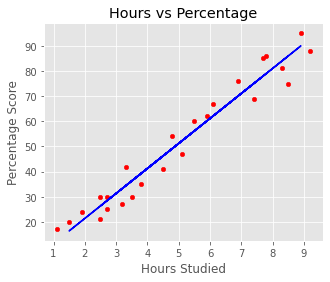

In [30]:
student.plot(kind='scatter',x='Hours',y='Scores',figsize=(5,4),color='r')
plt.plot(train_x, regression.coef_[0]*train_x + regression.intercept_,color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Blue line is the best fit line for the data

## Predicting the Percentage of Marks

In [32]:
pred_y = regression.predict(test_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.1,12.442587
1,2.5,26.359448
2,1.9,20.395079
3,9.2,92.961570
4,6.9,70.098155


## Comparing the Predicted Marks with the Actual Marks

In [33]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


## Visually Comparing the Predicted Marks with the Actual Marks

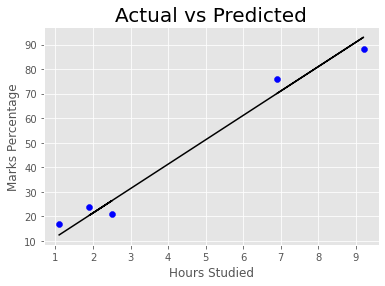

In [34]:
plt.scatter(x=test_x, y=test_y, color='blue')
plt.plot(test_x, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Evaluation of model

In [36]:
# Using metrics to find mean obsolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))
print("R2-score: %.2f" % r2_score(pred_y, test_y))

Mean absolute error:  4.877039354964483
R2-score: 0.98


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less. Higher the r2 value higher is the accuracy of model**

## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [37]:

hours = 9.25
predicted_score = regression.predict([[hours]])
print(f'No. of hours = {hours}')
print(f'predicted Score  = {predicted_score[0]}')


No. of hours = 9.25
predicted Score  = 93.45860055685802


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**